In [10]:
#https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("/kaggle/input/car-evaluation-data-set/car_evaluation.csv")
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [13]:
df.shape

(1727, 7)

In [14]:
col_names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]

In [15]:
#I corrected the columns names to work on the data easier
df.columns = col_names

In [16]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [17]:
#All is non-null but cleaning needed on Dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [18]:
#I want to see the distribution (balance) of data for each column
for col in df.columns:
    print(df[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [19]:
#class -> target variable, doors, persons -> numeric variable, persons. rest -> categorical

In [20]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [21]:
#I will clean the data set to work on them

In [22]:
df["doors"].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [23]:
#to simplify I will use 5 instead of 5more and more

In [24]:
df['doors'] = df['doors'].replace('5more', '5')
df["doors"].unique()

array(['2', '3', '4', '5'], dtype=object)

In [25]:
df['doors'] = df['doors'].astype(int)

In [26]:
df['persons'] = df['persons'].replace('more', '5')
df["persons"].unique()

array(['2', '4', '5'], dtype=object)

In [27]:
df['persons'] = df['persons'].astype(int)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   int64 
 3   persons   1727 non-null   int64 
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: int64(2), object(5)
memory usage: 94.6+ KB


In [29]:
#I will draw some graphs to see whether I can catagorize data and use decision tree

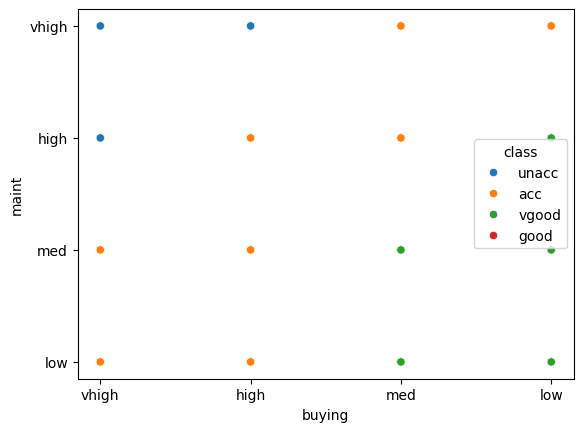

In [30]:
sns.scatterplot(x=df["buying"], y=df["maint"], hue=df["class"])
plt.show()

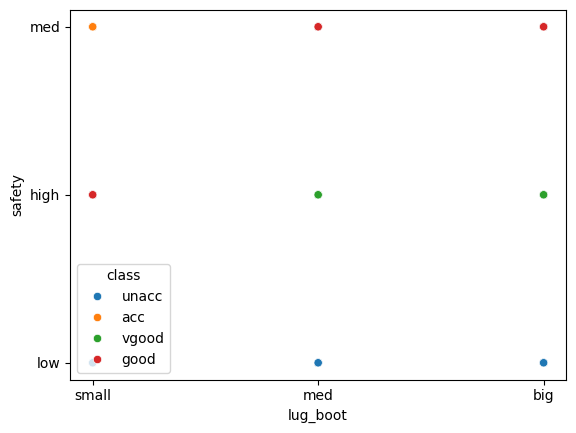

In [31]:
sns.scatterplot(x=df["lug_boot"], y=df["safety"], hue=df["class"])
plt.show()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   int64 
 3   persons   1727 non-null   int64 
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: int64(2), object(5)
memory usage: 94.6+ KB


In [33]:
X=df.drop('class', axis=1)
y=df["class"]

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=15)

In [35]:
X_train.shape

(1208, 6)

In [36]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [37]:
categorical_cols = ["buying", "maint", "lug_boot", "safety"]
numerical_cols = ["doors", "persons"]

ordinal_encoder = OrdinalEncoder(categories = [ 
    ["low", "med", "high", "vhigh"], #buying
    ["low", "med", "high", "vhigh"], #maint
    ["small", "med", "big"], #lug_boot
    ["low", "med", "high"] #safety
])

preprocessor = ColumnTransformer( transformers= [ #here I give the list to to transform
    ('transformation', ordinal_encoder, categorical_cols), #only 4 columns changed
], remainder="passthrough") # doors and persons untouched and added in the end of the table

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [38]:
X_train_transformed

array([[0., 3., 1., 1., 3., 2.],
       [0., 2., 1., 1., 5., 4.],
       [0., 2., 0., 1., 3., 4.],
       ...,
       [3., 0., 2., 1., 4., 2.],
       [2., 2., 2., 1., 5., 5.],
       [0., 2., 1., 2., 4., 5.]])

In [39]:
pd.DataFrame(X_train_transformed)[1]

0       3.0
1       2.0
2       2.0
3       3.0
4       0.0
       ... 
1203    1.0
1204    2.0
1205    0.0
1206    2.0
1207    2.0
Name: 1, Length: 1208, dtype: float64

In [40]:
pd.DataFrame(X_train_transformed)[0].unique()

array([0., 1., 3., 2.])

In [41]:
pd.DataFrame(X_train_transformed)[5].unique()

array([2., 4., 5.])

In [42]:
#First I will train the model with random parameters
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=0)
tree_model.fit(X_train_transformed, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [43]:
y_pred = tree_model.predict(X_test_transformed)

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [46]:
import warnings
warnings.filterwarnings('ignore')
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7861271676300579
[[ 62   0  59   0]
 [ 21   0   0   0]
 [ 10   0 346   0]
 [ 21   0   0   0]]
              precision    recall  f1-score   support

         acc       0.54      0.51      0.53       121
        good       0.00      0.00      0.00        21
       unacc       0.85      0.97      0.91       356
       vgood       0.00      0.00      0.00        21

    accuracy                           0.79       519
   macro avg       0.35      0.37      0.36       519
weighted avg       0.71      0.79      0.75       519



[Text(0.3333333333333333, 0.875, 'persons <= 3.0\ngini = 0.451\nsamples = 1208\nvalue = [263, 48, 853, 44]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 409\nvalue = [0, 0, 409, 0]'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'safety <= 0.5\ngini = 0.576\nsamples = 799\nvalue = [263, 48, 444, 44]'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 269\nvalue = [0, 0, 269, 0]'),
 Text(0.6666666666666666, 0.375, 'buying <= 1.5\ngini = 0.63\nsamples = 530\nvalue = [263, 48, 175, 44]'),
 Text(0.5, 0.125, 'gini = 0.647\nsamples = 270\nvalue = [142, 48, 36, 44]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.498\nsamples = 260\nvalue = [121, 0, 139, 0]')]

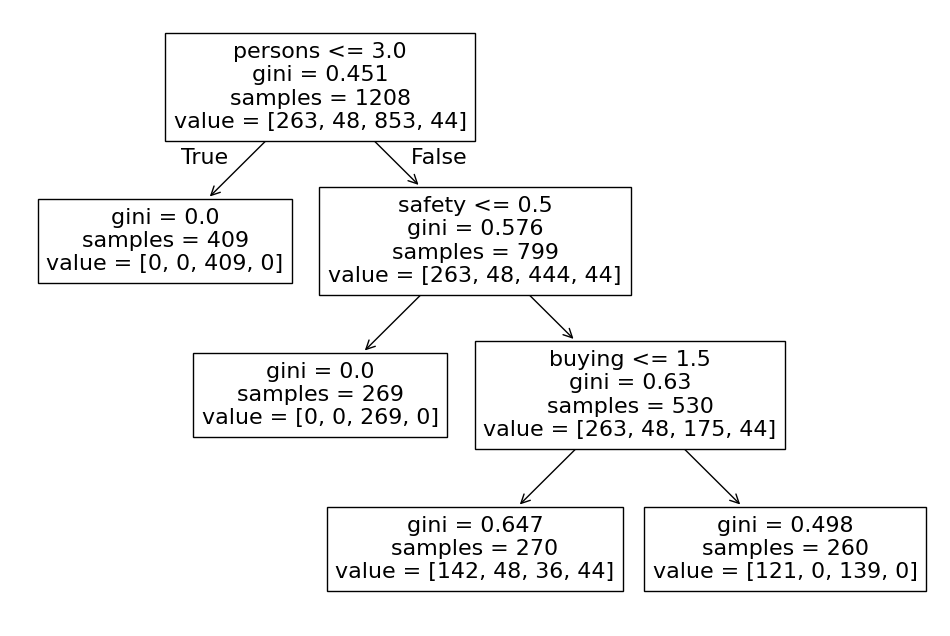

In [49]:
#Drawing tree
plt.figure(figsize=(12,8))
from sklearn import tree
column_names = categorical_cols + numerical_cols
tree.plot_tree(tree_model.fit(X_train_transformed, y_train),feature_names=column_names)

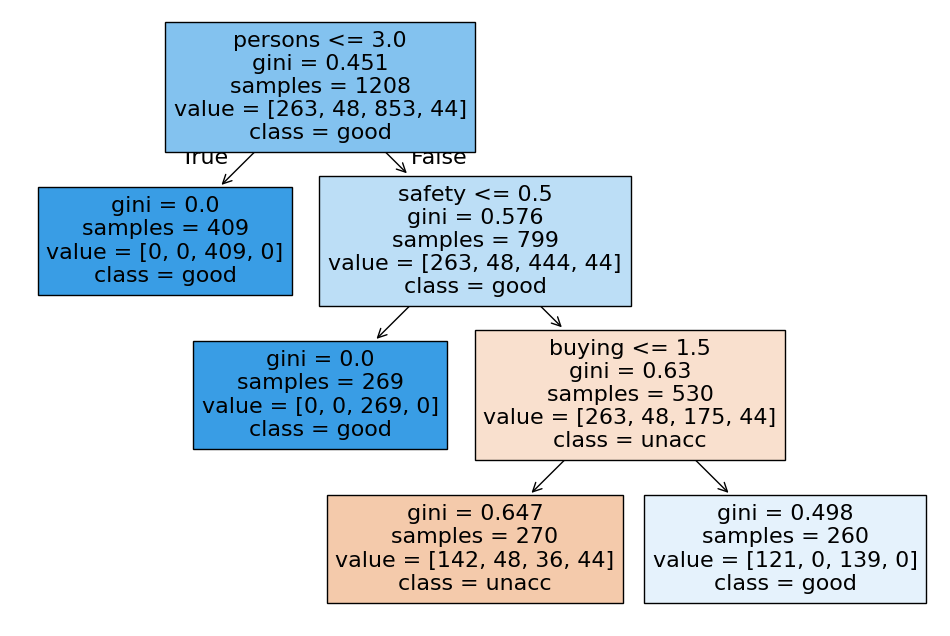

In [50]:
plt.figure(figsize=(12,8))
tree.plot_tree(tree_model, 
               feature_names=["buying", "maint", "lug_boot", "safety", "doors", "persons"],
               class_names=y_train.unique().astype(str),
               filled=True)
plt.show()

In [51]:
#hyperparameter tuning

In [63]:
from sklearn.model_selection import KFold
param = {
    "criterion" : ["gini", "entropy", "log_loss"],
    "splitter" : ["best", "random"],
    "max_depth" : [1,2,3,4,5,15,None],
    "max_features" : ["sqrt", "log2", None]
}

# To ensure the data is always divided into the same 5 parts
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [66]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator = DecisionTreeClassifier(random_state=42), param_grid=param, cv=kf,scoring="accuracy")

In [67]:
grid.fit(X_train_transformed, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 15, None],
                         'max_features': ['sqrt', 'log2', None],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [68]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': None,
 'splitter': 'best'}

In [69]:
y_pred = grid.predict(X_test_transformed)

In [70]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.976878612716763
[[119   0   1   1]
 [  3  18   0   0]
 [  7   0 349   0]
 [  0   0   0  21]]
              precision    recall  f1-score   support

         acc       0.92      0.98      0.95       121
        good       1.00      0.86      0.92        21
       unacc       1.00      0.98      0.99       356
       vgood       0.95      1.00      0.98        21

    accuracy                           0.98       519
   macro avg       0.97      0.96      0.96       519
weighted avg       0.98      0.98      0.98       519



In [71]:
#rewrting the new model with the best parameters
tree_model_new = DecisionTreeClassifier(criterion="gini",max_depth=15, max_features=None, splitter="best")
tree_model_new.fit(X_train_transformed, y_train)
y_pred = tree_model_new.predict(X_test_transformed)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.976878612716763
[[119   0   1   1]
 [  3  18   0   0]
 [  7   0 349   0]
 [  0   0   0  21]]
              precision    recall  f1-score   support

         acc       0.92      0.98      0.95       121
        good       1.00      0.86      0.92        21
       unacc       1.00      0.98      0.99       356
       vgood       0.95      1.00      0.98        21

    accuracy                           0.98       519
   macro avg       0.97      0.96      0.96       519
weighted avg       0.98      0.98      0.98       519



[Text(0.6114864864864865, 0.9615384615384616, 'persons <= 3.0\ngini = 0.451\nsamples = 1208\nvalue = [263, 48, 853, 44]'),
 Text(0.597972972972973, 0.8846153846153846, 'gini = 0.0\nsamples = 409\nvalue = [0, 0, 409, 0]'),
 Text(0.6047297297297298, 0.9230769230769231, 'True  '),
 Text(0.625, 0.8846153846153846, 'safety <= 0.5\ngini = 0.576\nsamples = 799\nvalue = [263, 48, 444, 44]'),
 Text(0.6182432432432432, 0.9230769230769231, '  False'),
 Text(0.6114864864864865, 0.8076923076923077, 'gini = 0.0\nsamples = 269\nvalue = [0, 0, 269, 0]'),
 Text(0.6385135135135135, 0.8076923076923077, 'buying <= 1.5\ngini = 0.63\nsamples = 530\nvalue = [263, 48, 175, 44]'),
 Text(0.39864864864864863, 0.7307692307692307, 'maint <= 1.5\ngini = 0.647\nsamples = 270\nvalue = [142, 48, 36, 44]'),
 Text(0.19932432432432431, 0.6538461538461539, 'safety <= 1.5\ngini = 0.697\nsamples = 134\nvalue = [43, 48, 8, 35]'),
 Text(0.08108108108108109, 0.5769230769230769, 'lug_boot <= 0.5\ngini = 0.546\nsamples = 65\nval

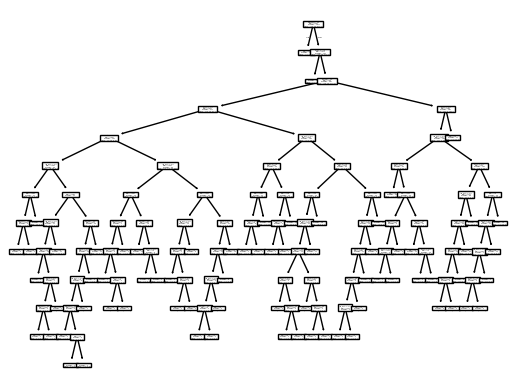

In [72]:
tree.plot_tree(tree_model_new.fit(X_train_transformed, y_train),feature_names=column_names)

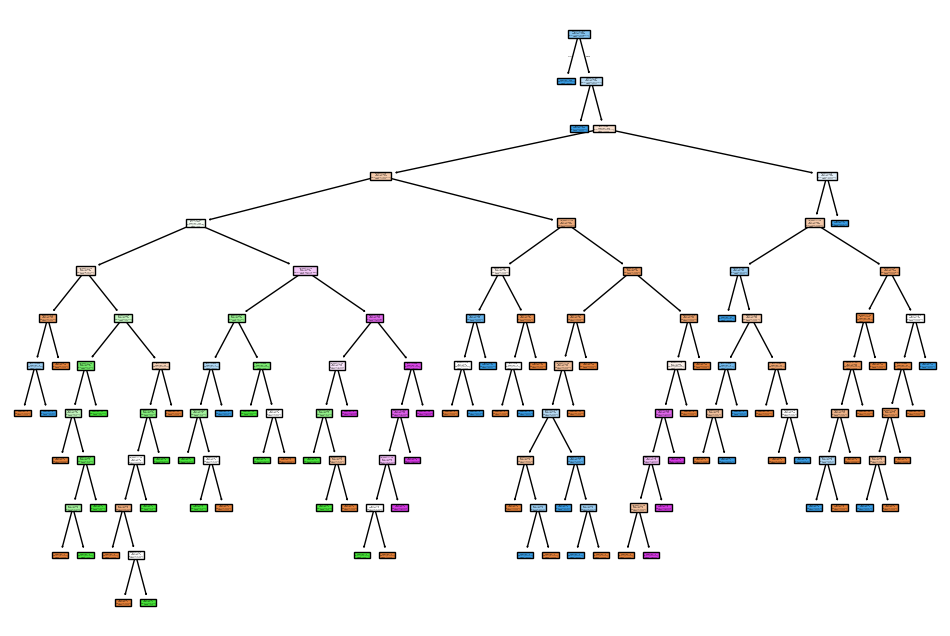

In [74]:
plt.figure(figsize=(12,8))
tree.plot_tree(tree_model_new, 
               feature_names=["buying", "maint", "lug_boot", "safety", "doors", "persons"],
               class_names=y_train.unique().astype(str),
               filled=True)
plt.show()